
Name: Tiffany Akwarandu



# **Project 11: Hierarchical Clustering and Cluster Evaluation**

This week's assignment involves analyzing past presidential election results, specifically for the years 2008, 2012, and 2016. We will use data from [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections), divided into two datasets:

`votes_by_state.csv` - Contains the raw vote counts for the leading presidential candidates from 2008-2012 for each US state, including the District of Columbia.

`republican_percentage_by_state.csv` - Shows the percentage of votes for the Republican candidate in 2008, 2012, and 2016 for each US state, including the District of Columbia.

Our goal is to group states based on their voting patterns using hierarchical agglomerative clustering techniques, and then to evaluate the outcomes.

Utilizing the Scipy library, we will plot the hierarchical clusters derived from the raw vote counts (`votes_by_state.csv`) employing three different proximity measures: ward, minimum, and maximum.

### **Importing the necessary libraries**

In [ ]:
# Do not modify import block, all necessary imports are included
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Packages needed for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, cdist, squareform

# Packages needed for K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

### **Q1: Load the `votes_by_state.csv` file into a dataframe**



In [ ]:
# Load the dataset `votes_by_state.csv, and store the state names into another series and leave the attributes.
df_votes = pd.read_csv('votes_by_state.csv')
df_votes.head()

# Save the 'State' column into a Series object named 'states'
states = df_votes['State']


# Save the rest of the columns (excluding the 'State' column) into a dataframe named 'attribute'
attributes = df_votes.drop(columns=['State'])



## **Q2 - Using Different Proximity Functions**

We will be utilizing SciPy, a scientific Python library that includes a [hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) module and capabilities for plotting [dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram).

Your task is to employ these libraries to create dendrograms representing hierarchical clusters from the votes_by_state.csv dataset, focusing on the raw vote count. Apply three different proximity measures for this purpose:

* Ward
* Minimum (Min)
* Maximum (Max)


Ensure the x-axis of each dendrogram is labeled with state names, rather than their indices in the dataframe. The dendrogram's title should indicate the proximity measure used for clustering. In this analysis, the attributes are the number of votes cast, and the labels are the state names.

Adjust the plot size for clarity; a figure size of figsize=(25,8) is recommended, though this may need tweaking based on your display settings.

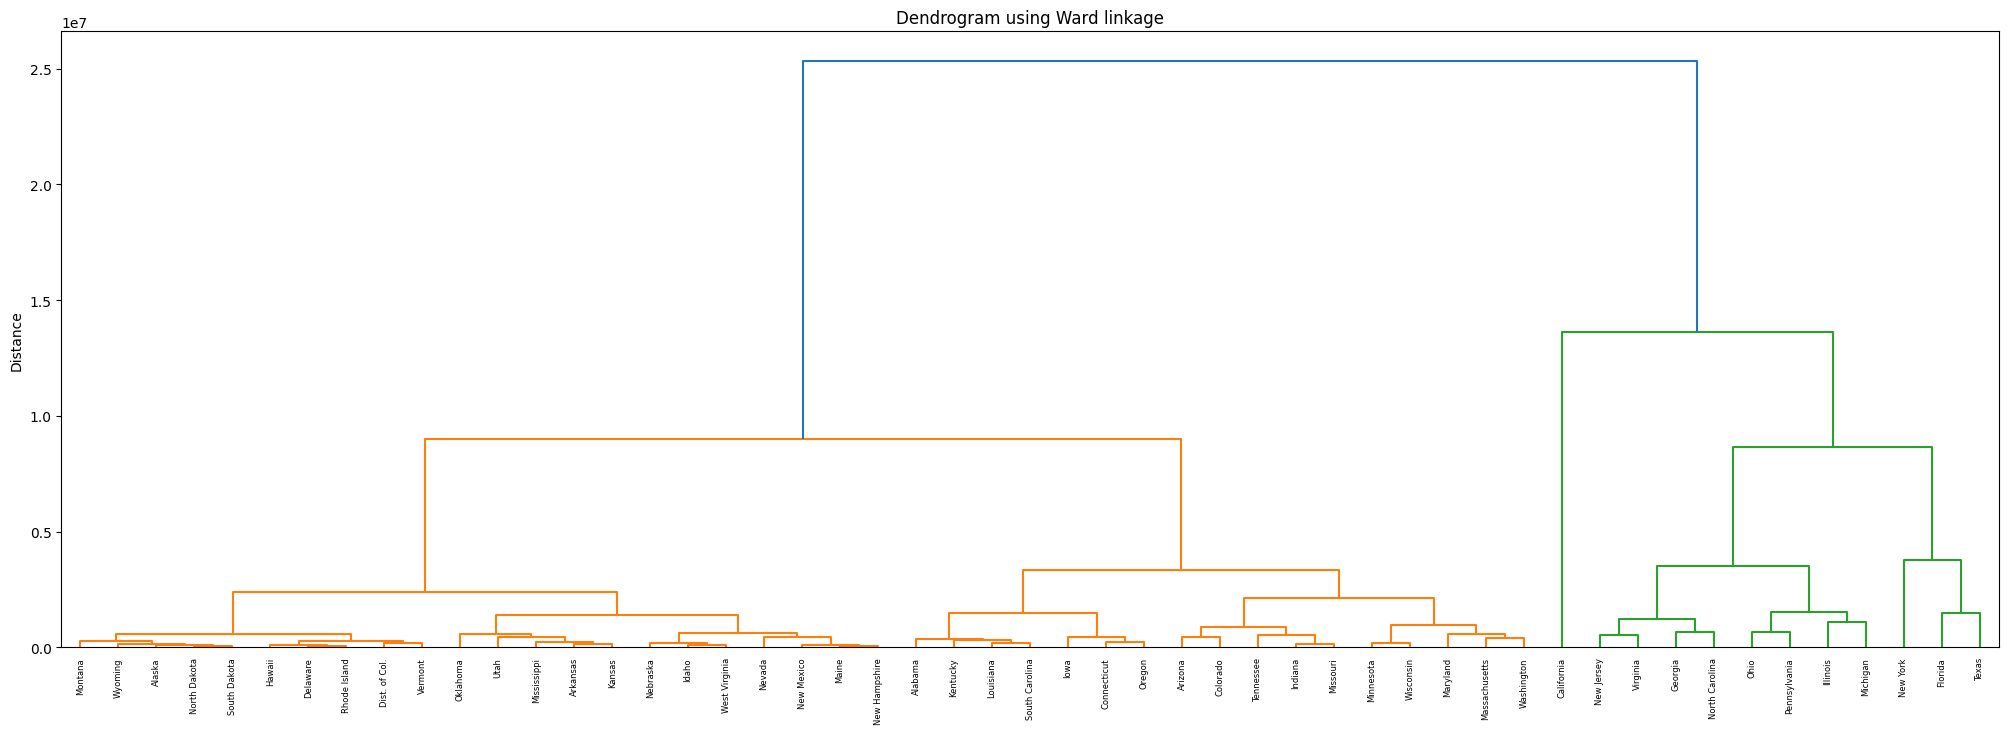

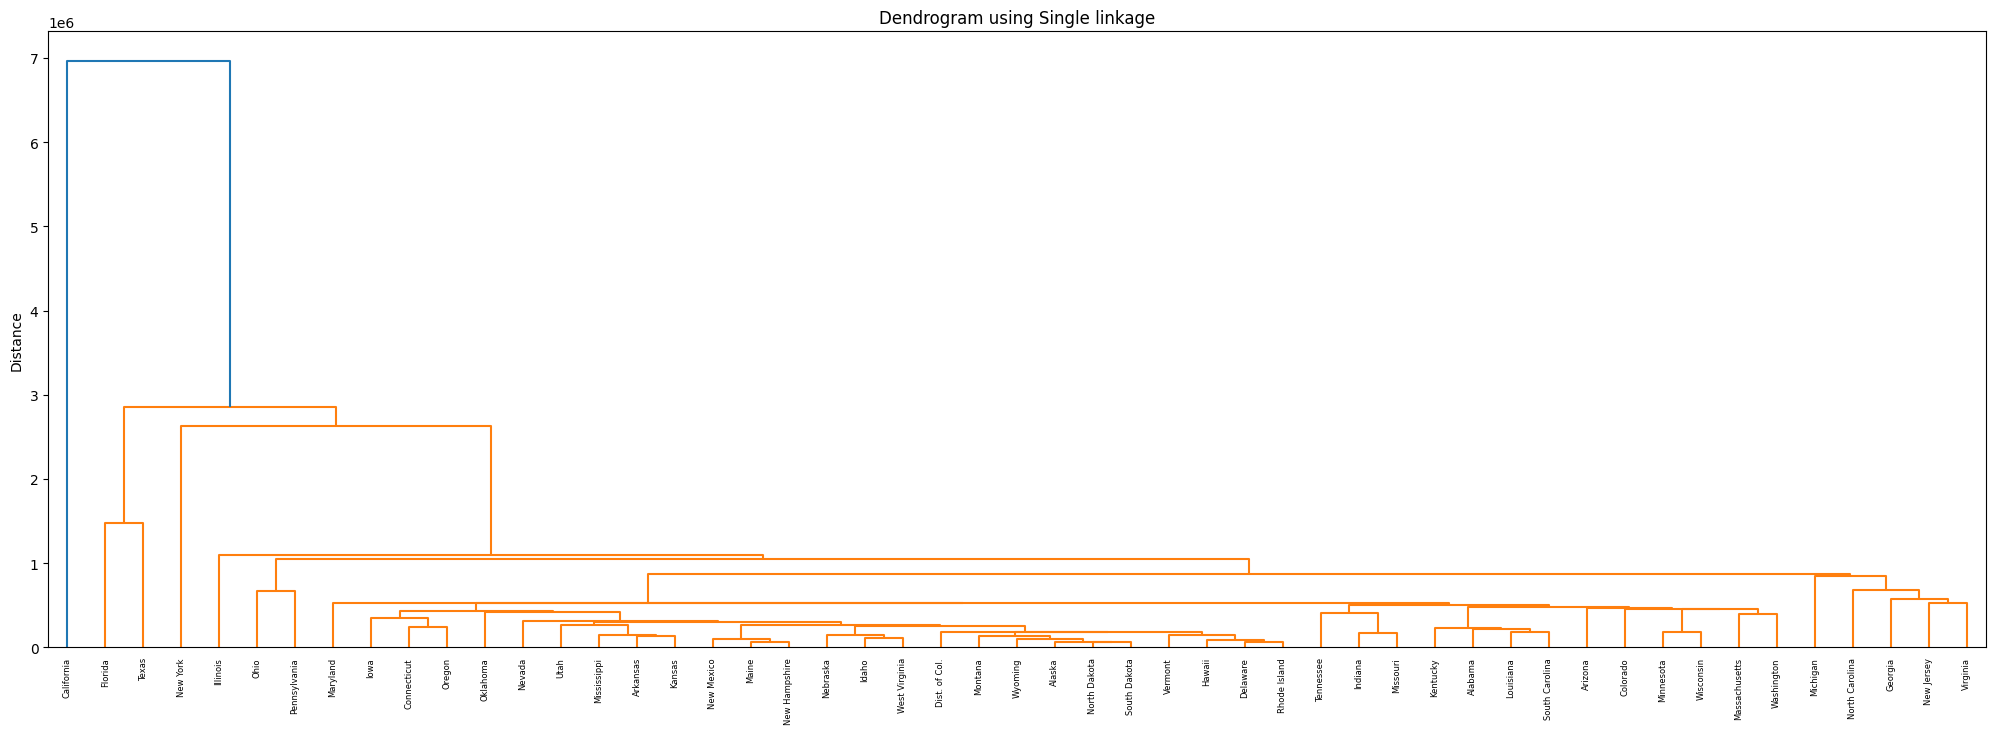

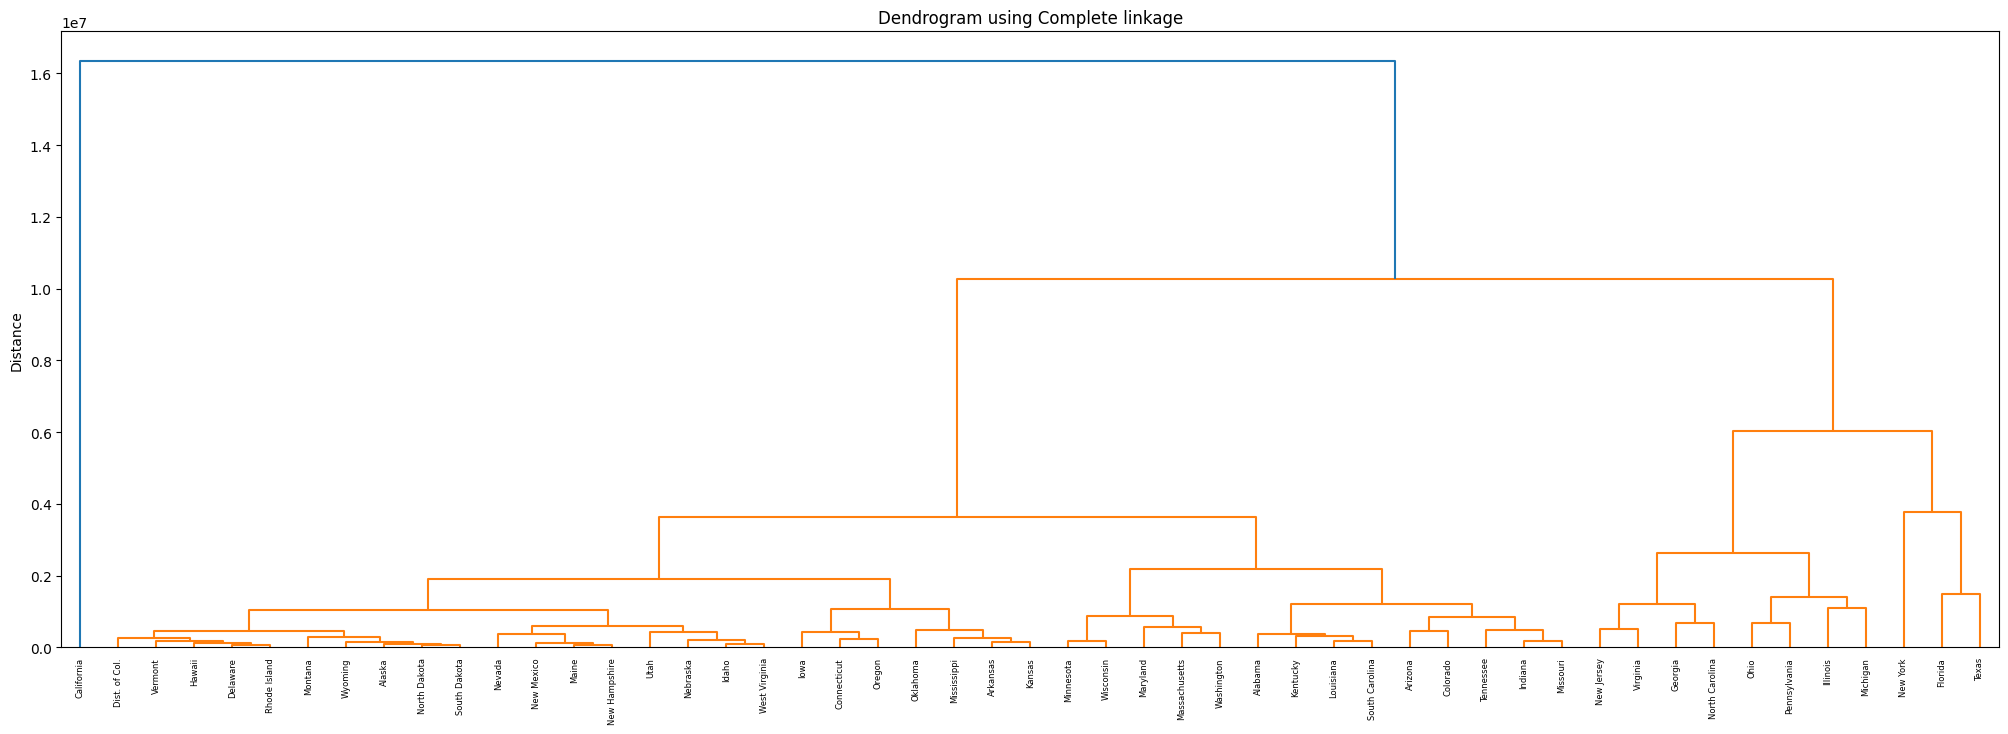

In [ ]:
# write your code here

methods = ['ward', 'single', 'complete']
for method in methods:
    Z = linkage(attributes, method=method)
    plt.figure(figsize=(25, 8))
    dendrogram(Z, labels=states.values, leaf_rotation=90)
    plt.title(f"Dendrogram using {method.title()} linkage")
    plt.ylabel("Distance")
    plt.show()


## **Q3 - Using Different Proximity Functions (part 2)**

Observing the dendrograms, it may initially seem counterintuitive to see New York closer to Texas than to California across all plots. This unexpected grouping prompts a reevaluation of the underlying factors influencing these clusters, leading to the insight that a state's population size might play a more critical role than the prevailing political party.

To address this, we have refined our approach by reducing the dataset from seven attributes to three, each representing the percentage of votes for the Republican candidate across different elections, plus a fourth attribute capturing the variance in these percentages. This process is encapsulated in the `republican_percentage_by_state.csv` file.

Your next task is to plot hierarchical clusters based on the percentage of Republican votes using the following proximity measures:

* Ward
* Minimum (Min)
* Maximum (Max)

Ensure the dendrogram's x-axis is annotated with state names, not dataframe indices, and that the title clearly indicates the proximity measure employed. Here, the focus is on the proportions of votes rather than their absolute numbers, with state names serving as data labels.


Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup.

In [ ]:
df_republican_updated = pd.read_csv('republican_percentage_by_state.csv')

In [ ]:
# Separate state names, store into a Series, and save attributes and save the rest of the columns (excluding the 'State' column) into a dataframe named 'republican_attributes'
states_repub = df_republican_updated['State']
repub_attributes = df_republican_updated.drop(['State'], axis=1)

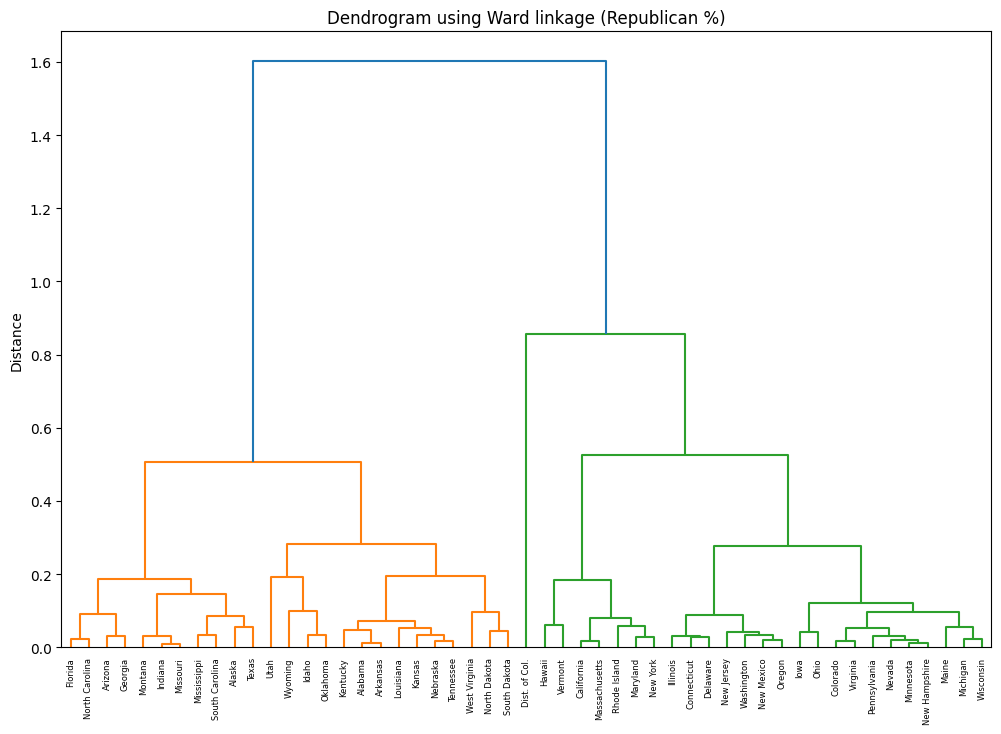

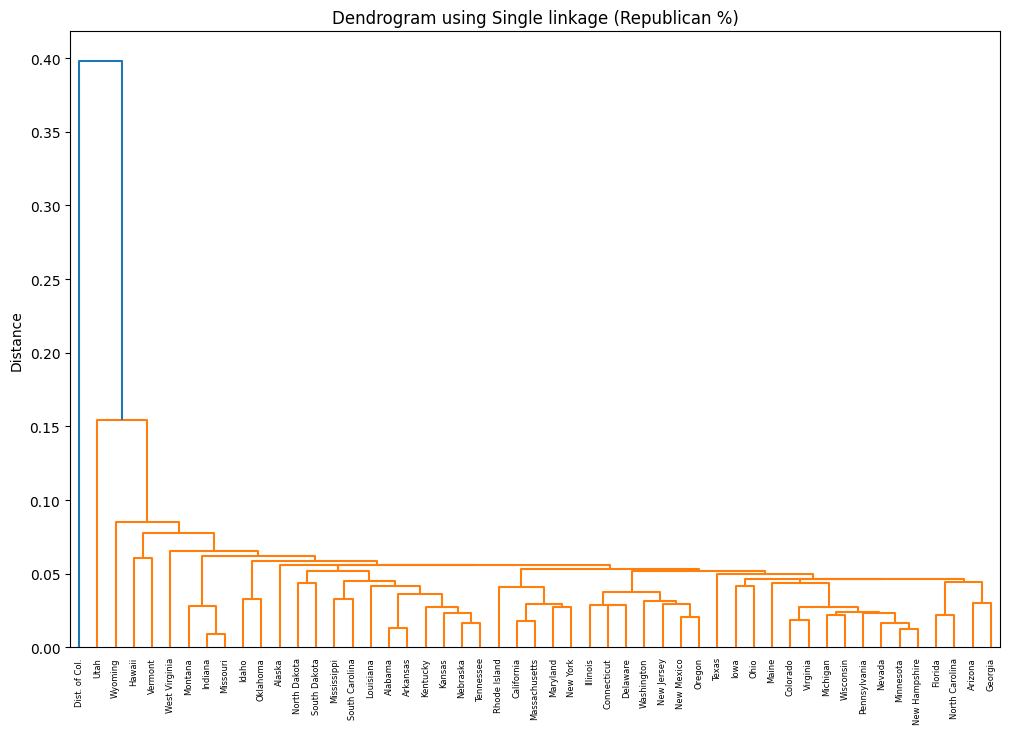

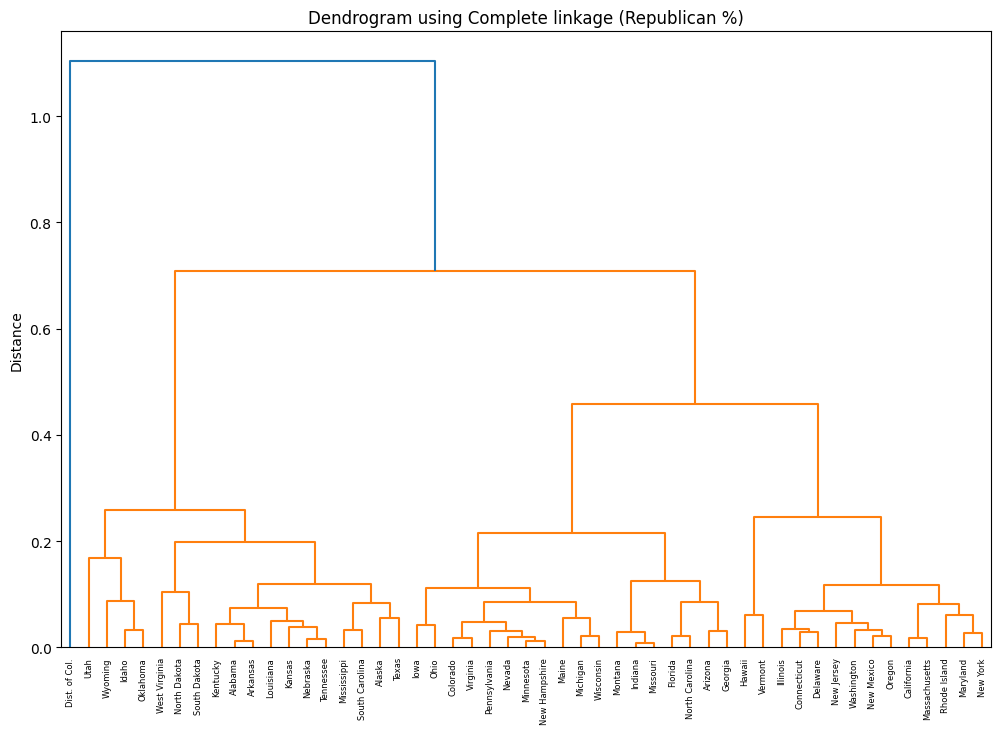

In [ ]:
# Perform hierarchical clustering using eaxh of the specified linkage methods
for method in methods:
    Z = linkage(repub_attributes, method=method)
    plt.figure(figsize=(12, 8))
    dendrogram(Z, labels=states_repub.values, leaf_rotation=90)
    plt.title(f"Dendrogram using {method.title()} linkage (Republican %)")
    plt.ylabel("Distance")
    plt.show()

## **Q4: Calculate the Cophenetic Correlation Coefficient**

The Cophenetic Correlation Coefficient measures the correlation between the actual pairwise distances of all samples in the original dataset and their cophenetic distances, which are the distances between samples as represented by the height of the dendrogram at which they are first joined together.

A coefficient closer to 1 indicates that the dendrogram accurately represents the original distances among samples, while a lower value suggests a less accurate representation.

* Using the data from question 3 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.

* Display the results, and briefly explain how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter.


Note: `pdist` (Pairwise Distance): This function calculates the pairwise distances between all pairs of points within a single collection of inputs. It takes a single input array X and generates a condensed distance matrix, which is a flat array containing the distances between every pair of points in X. If X has n points, the size of the output array will be n*(n-1)/2, corresponding to the number of unique point pairs. To convert this condensed distance matrix into a square, readable form, you can use `squareform` from the same module.



In [ ]:
# Calculate the Cophenetic Correlation Coefficient for each linkage method
pdist_repub = pdist(repub_attributes)
cophenetic_results = {}
for method in methods:
    Z = linkage(repub_attributes, method=method)
    coph_corr, _ = cophenet(Z, pdist_repub)
    cophenetic_results[method] = coph_corr
# Display the results
cophenetic_results


{'ward': np.float64(0.5883071696030502),
 'single': np.float64(0.695463585768092),
 'complete': np.float64(0.7406937703705782)}

### **Q4.1: Explain:**

* In the given context based on the results from Q4, which linkage method, among Ward, Minimum (Min), and Maximum (Max), demonstrates the highest Cophenetic Correlation Coefficient, thereby most accurately preserving the original distances within the dendrogram structure?


### **Your Answer:**

That would be the complete linkage method : 0.741, as its the most accurate
*   List item
*   List item



*

#### **Beginning with following questions, we will delve further into the intricacies of implementing hierarchical clustering.**

## **Q5: Calculate minimum linkage between clusters**

* Given two clusters
  * `X1 = [[1,1], [3,2], [3,7], [4,8], [1,4]]`
  * `X2 = [[9,1], [7,2], [9,7], [8,3]]`
  
  calculate the distance between clusters X1 and X2 using the minimum (Single) linkage method.

* Please implement the calculation of this distance in the function below and return the distance.
  * You can use `pdist` or `cdist` [ https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html]  with the distance metric of euclidian for this method.

In [ ]:
def min_linkage(X1, X2):
  return np.min(cdist(X1, X2, metric='euclidean'))

## **Q6: Calculate max linkage between clusters**

* Given two clusters
  * `X1 = [[1,1], [3,2], [3,7], [4,8], [1,4]]`
  * `X2 = [[9,1], [7,2], [9,7], [8,3]]`
  
  calculate the distance between clusters X1 and X2 based on max(complete) Linkage

* Please implement the calculation of this distance in the function below and return the distance.

In [ ]:
def max_linkage(X1, X2):
    return np.max(cdist(X1, X2, metric='euclidean'))


## **Q7: Calculate Centroid Linkage**

* Given two clusters
  * `X1 = [[1,1], [3,2], [3,7], [4,8], [1,4]]`
  * `X2 = [[9,1], [7,2], [9,7], [8,3]]`
  
  Implement the distance calculation function between X1 and X2 based on centroid Linkage and return it.

In [ ]:
def centroid_linkage(X1, X2):
    centroid1 = np.mean(X1, axis=0)
    centroid2 = np.mean(X2, axis=0)
    return np.linalg.norm(centroid1 - centroid2)

## **Q8: Average linkage**

 * Given two clusters
  * `X1 = [[1,1], [3,2], [3,7], [4,8], [1,4]]`
  * `X2 = [[9,1], [7,2], [9,7], [8,3]]`
  
  Implement the distance calculation function between X1 and X2 based on Average Linkage and return it.

In [ ]:
def average_linkage(X1, X2):
    return np.mean(cdist(X1, X2, metric='euclidean'))



## **Q9: Ward Linkage**

* Given two clusters
  * `X1 = [[1,1], [3,2], [3,7], [4,8],[1,4]]`
  * `X2 = [[9,1], [7,2], [9,7], [8,3]]`
  
  Implement the distance calculation between X1 and X2 based on Ward Linkage. Then implement its dendogram. PS: This does not need to be writtent as a python method.


* The Ward distance between two clusters is not directly computed in the same manner as distances like the maximum, minimum, or average linkage. Instead, Ward's method minimizes the total within-cluster variance. At each step, the pair of clusters with the minimum increase in total within-cluster variance after merging is chosen to merge.

* In a hierarchical clustering context, particularly when using libraries like SciPy, Ward's method is typically applied through the linkage process rather than calculating a "Ward distance" directly between two sets of points. The increase in variance for merging two clusters is implicitly considered during the hierarchical clustering process.

* To illustrate how Ward's method is applied in practice, one would usually use it with the [linkage](https://colab.research.google.com/drive/1zQBo2IiYZWA-iDx3XL8VF4F33aJtOaNN#scrollTo=QYaOwlUUEnsv&line=14&uniqifier=1) function from SciPy's hierarchy module, specifying 'ward' as the method. This approach doesn't yield a single Ward distance value between two clusters but rather builds a hierarchical clustering model based on the Ward criterion.

In [ ]:
# Write your code here
def ward_linkage(X1, X2):
    centroid1 = np.mean(X1, axis=0)
    centroid2 = np.mean(X2, axis=0)
    n1 = len(X1)
    n2 = len(X2)
    return (n1 * n2) / (n1 + n2) * np.sum((centroid1 - centroid2)**2)


### **DBSCAN in Python**

In this part of the homework, we will use the DBSCAN implementation from the `scikit-learn` library.

* Let's start by generating some synthetic data like we did in our in class exercise and then apply DBSCAN to it.

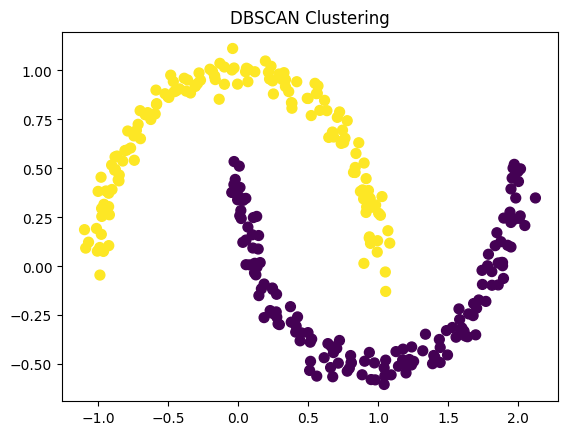

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

## **Q10: Implement the Pseudocode**

* Using the [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) from Wikipedia, implement RangeQuery.

* Print out the N set(represented by indices of points in data frame) when Q is the 0-th point in X([ 0.71541261, -0.49408918]) and 5-th point in X([ 1.2397133 , -0.4114107 ])

```
RangeQuery(DB, distFunc, Q, eps) {
    Neighbors N := empty list
    for each point P in database DB {                      /* Scan all points in the database */
        if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
            N := N ∪ {P}                                   /* Add to result */
        }
    }
    return N
}
```

* The "DB" parameter is a dataframe, `df_data` containing all of the points in our data set, the "distFunc" is set as Euclidean distance, thus should not be passed in, the point "Q", is represented by the index of the dataframe, `q_index`, where `df_data.iloc[q_index]` is the actual point, and `eps` is a floating point value that indicates the radius from the point "Q" to search for neighbors.  

* The function will return the slice of `df_data` of all points within `eps` distance of "Q" (including "Q").  The indices on the slice should be preserved (do not reset_index).  

In [ ]:
def range_query(df_data, q_index, eps):
    # Initialize an empty list to store the indices of neighbors
    neighbors = []

    # Retrieve the query point Q using its index
    Q = df_data.iloc[q_index].values

    # Iterate through all points in the DataFrame
    for idx, row in df_data.iterrows():

        # Calculate Euclidean distance between Q and each point P
        dist = np.linalg.norm(Q - row.values)

        # If distance is less than or equal to eps, add the index of P to neighbors
        if dist <= eps:
            neighbors.append(idx)

    # Return the slice of df_data corresponding to the neighbors' indices
    return df_data.loc[neighbors]


# Example usage
# Assuming df_data is your DataFrame and contains points including [0.71541261, -0.49408918] at index 0 and [1.2397133, -0.4114107] at index 5.
# Example DataFrame creation for demonstration:
data = {
    'x': [0.71541261, 1, 2, 1.2397133, 3, 4, 5],
    'y': [-0.49408918, 2, 3, -0.4114107, 5, 6, 7]
}
df_data = pd.DataFrame(data)

# Query parameters
eps = 1.0  # example epsilon value

# Query for the 0-th and 5-th points
result_0 = range_query(df_data, 0, eps)
result_5 = range_query(df_data, 5, eps)

print("Neighbors for 0-th point:", result_0.index.tolist())
print("Neighbors for 5-th point:", result_5.index.tolist())


Neighbors for 0-th point: [0, 3]
Neighbors for 5-th point: [5]


## **Q11: Observe the Differences**

* Using the above synthetic dataset `X`, compare the results of DBSCAN with hierarchical clustering algorithm. What are the key differences you notice?



### **Your Answer Here:**

-the DBSCAN treats both poins as noise or small clutters depending on the min samples, while the heierarchical clustering results , every point was assigned to a cluster , even ones with no close neighbors.